In [1]:
# Association Rules

In [8]:
"""
Interview Questions:

Q.1) What is lift and why is it important in association rules?
Answer: Lift measures how much more likely the antecedent and consequent are to occur together than if they were independent. 
A lift greater than 1 indicates a positive association, meaning the occurrence of the antecedent increases the likelihood of the consequent. 
It helps identify strong associations that are not due to random chance.

Q.2) What is support and confidence in association rules? How do you calculate them?
Answer: Support is the proportion of transactions that contain a particular itemset. It indicates how frequently an itemset appears in the dataset.
Confidence is the conditional probability that a transaction containing the antecedent also contains the consequent. It measures the reliability of the rule.
Support(A -> B) = (Number of transactions containing A and B) / (Total number of transactions)
Confidence(A -> B) = (Number of transactions containing A and B) / (Number of transactions containing A)

Q.3) What ae some limitations and challenges of using association rule mining?
Answer: Some limitations and challenges include:
- Scalability: Large datasets can lead to a combinatorial explosion of itemsets, making computation intensive.
- Choosing thresholds: Setting appropriate minimum support and confidence thresholds can be difficult and may lead to missing important rules or generating too many irrelevant ones.
- Interpretability: A large number of generated rules can be overwhelming, making it hard to identify the most useful ones.
"""

'\nInterview Questions:\n\nQ.1) What is lift and why is it important in association rules?\nAnswer: Lift measures how much more likely the antecedent and consequent are to occur together than if they were independent. \nA lift greater than 1 indicates a positive association, meaning the occurrence of the antecedent increases the likelihood of the consequent. \nIt helps identify strong associations that are not due to random chance.\n\nQ.2) What is support and confidence in association rules? How do you calculate them?\nAnswer: Support is the proportion of transactions that contain a particular itemset. It indicates how frequently an itemset appears in the dataset.\nConfidence is the conditional probability that a transaction containing the antecedent also contains the consequent. It measures the reliability of the rule.\nSupport(A -> B) = (Number of transactions containing A and B) / (Total number of transactions)\nConfidence(A -> B) = (Number of transactions containing A and B) / (Num

In [7]:
# ==============================
# Association Rule Mining
# Corrected & Clean Code
# ==============================

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# ------------------------------
# 1. Load the Dataset
# ------------------------------
df = pd.read_excel("C:/Users/Shreyas Mahale/Downloads/Association Rules/Association Rules/Online retail.xlsx")

# First, let's check the column names
print("Column names:", df.columns.tolist())

# ------------------------------
# 2. Data Preprocessing
# ------------------------------

# Check if the dataframe has the expected columns, if not handle accordingly
if 'Description' in df.columns and 'InvoiceNo' in df.columns:
    # Removing missing InvoiceNo or Description
    df.dropna(subset=["InvoiceNo", "Description"], inplace=True)
    
    # Removing cancelled transactions (InvoiceNo starting with 'C', for cancelled)
    df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]
    
    # Filtering and keeping only positive quantities
    if 'Quantity' in df.columns:
        df = df[df["Quantity"] > 0]
    
    # Convert InvoiceNo to string
    df["InvoiceNo"] = df["InvoiceNo"].astype(str)
    
    # ------------------------------
    # 3. Create Transactions
    # ------------------------------
    transactions = (df.groupby("InvoiceNo")["Description"].apply(list).tolist())
else:
    # If columns don't exist, assume data is already in transaction format
    print("Expected columns not found. Checking data structure...")
    print(df.head())
    # Parse the comma-separated items from the first column
    if len(df.columns) == 1:
        col = df.columns[0]
        # Split by comma and clean whitespace
        transactions = [[item.strip() for item in str(row).split(',')] for row in df[col]]
    else:
        transactions = df.values.tolist()

print(f"\nNumber of transactions: {len(transactions)}")
print(f"Sample transaction: {transactions[0]}")

# ------------------------------
# 4. One-Hot Encoding
# ------------------------------
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

basket_df = pd.DataFrame(te_array, columns=te.columns_)

print(f"Basket dataframe shape: {basket_df.shape}")

# ------------------------------
# 5. Apply Apriori Algorithm
# ------------------------------
# Lowered min_support to find more itemsets
frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)

print(f"Number of frequent itemsets: {len(frequent_itemsets)}")

# ----------------------------------------------
# 6. Generate necessary Association Rules
# ----------------------------------------------
if len(frequent_itemsets) > 1:
    # Lowered min_threshold to find more rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
    
    if len(rules) > 0:
        # Sort rules by lift
        rules = rules.sort_values(by="lift", ascending=False)
        print(f"Number of association rules generated: {len(rules)}")
    else:
        print("No rules generated with current thresholds. Trying with lower confidence threshold...")
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
        if len(rules) > 0:
            rules = rules.sort_values(by="lift", ascending=False)
            print(f"Number of association rules generated: {len(rules)}")
else:
    print("Not enough frequent itemsets to generate rules.")
    rules = pd.DataFrame()

# Display top rules
if len(rules) > 0:
    print("\nTop 5 Rules:")
    print(rules.head())
    print("\nBottom 5 Rules:")
    print(rules.tail())
else:
    print("No association rules found.")

Column names: ['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil']
Expected columns not found. Checking data structure...
  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                        

In [4]:
print(df.columns)

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')


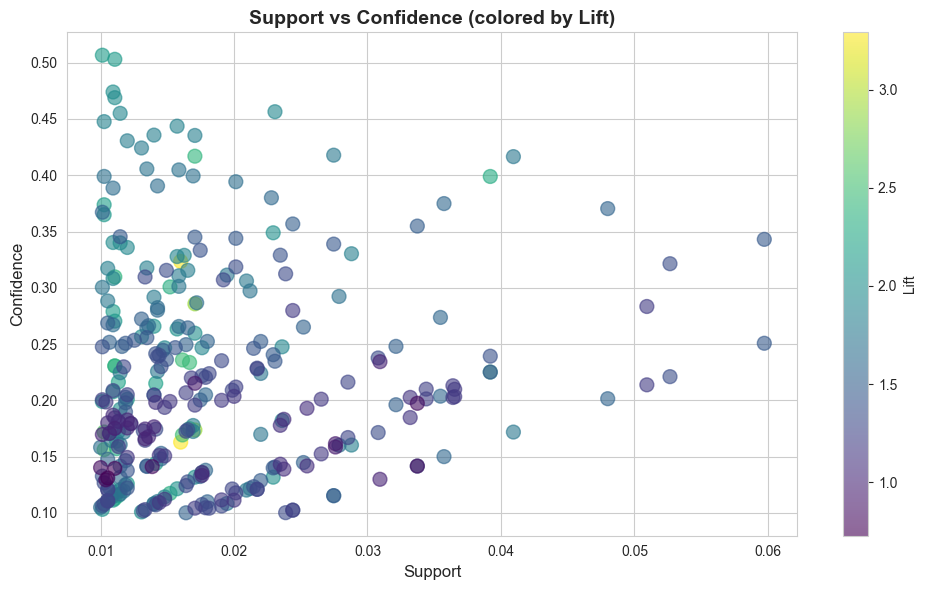

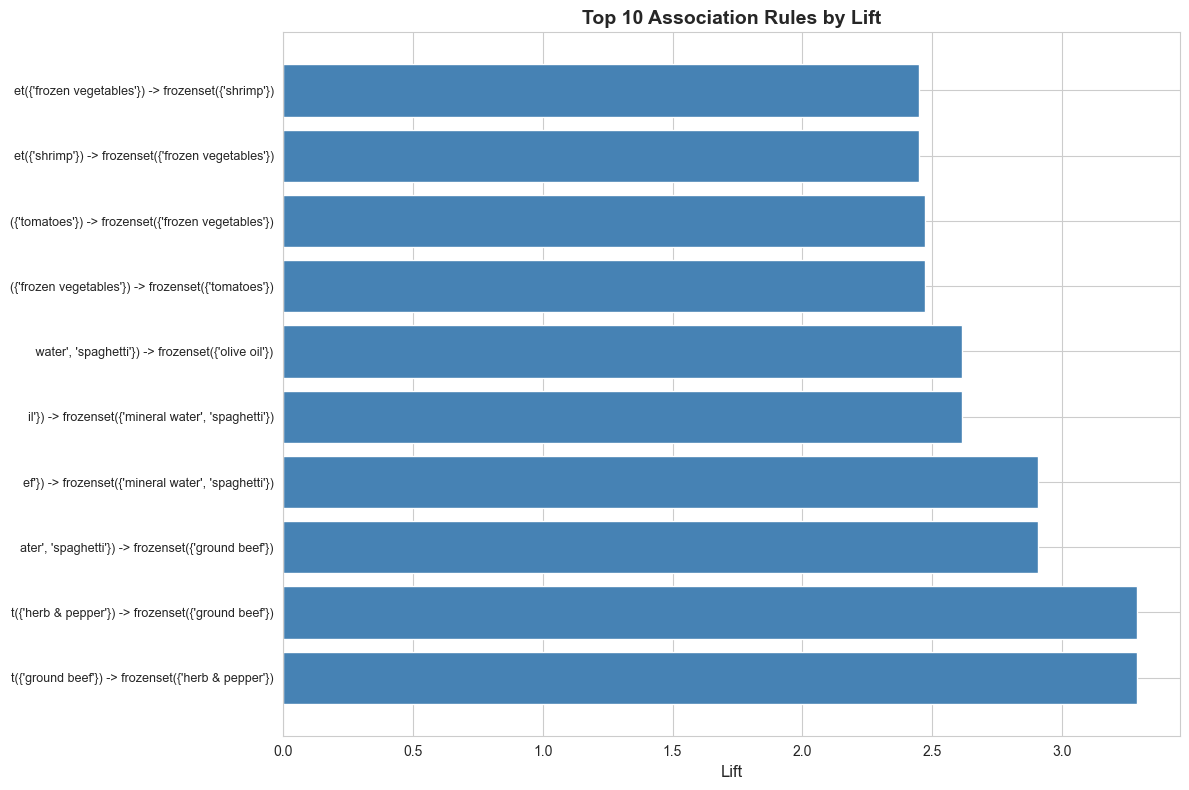

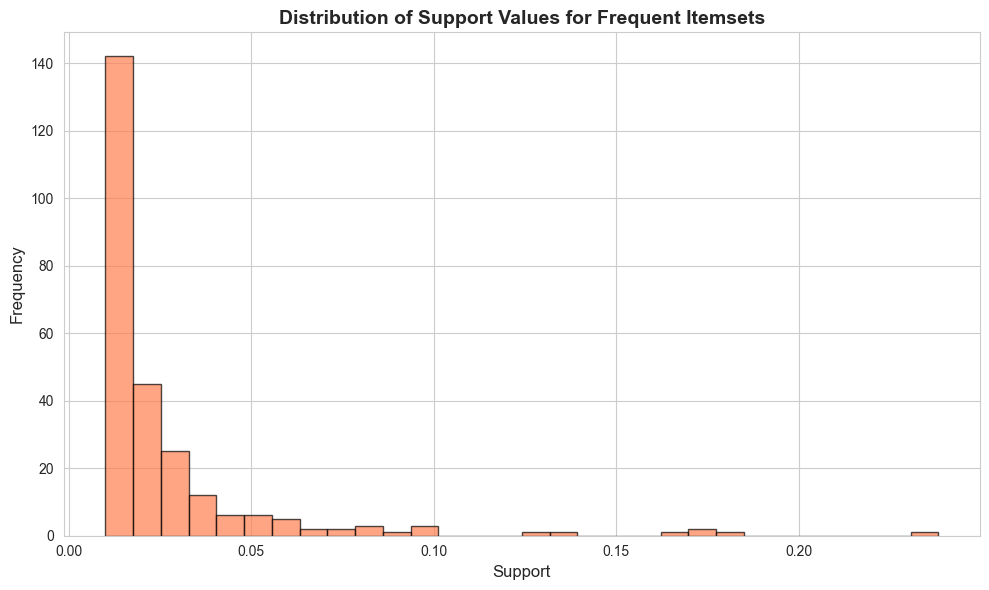

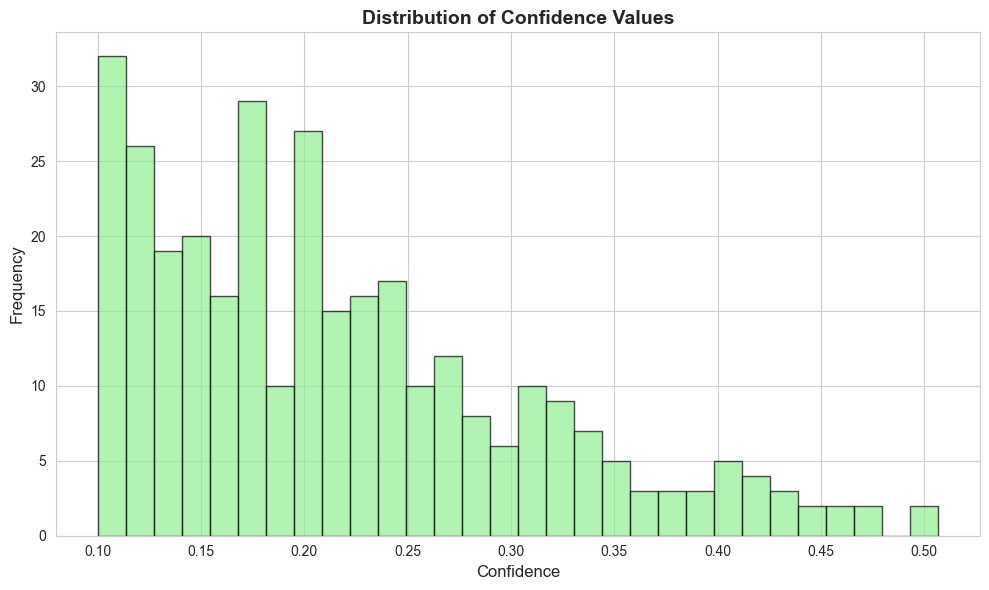

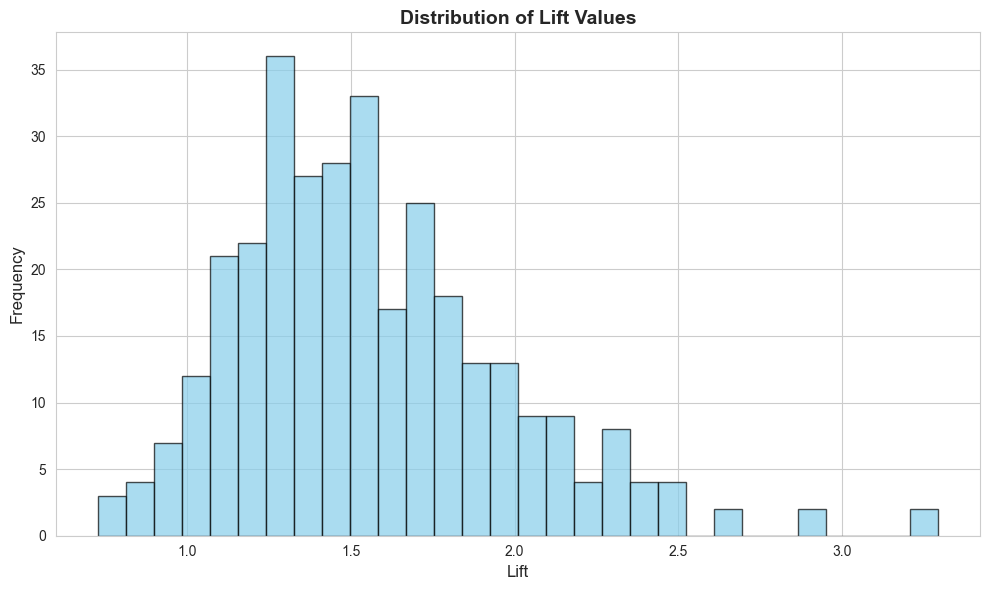


ASSOCIATION RULES SUMMARY STATISTICS
Total number of frequent itemsets: 259
Total number of association rules: 323

Rules Statistics:
  Support - Min: 0.0100, Max: 0.0597, Mean: 0.0183
  Confidence - Min: 0.1001, Max: 0.5067, Mean: 0.2169
  Lift - Min: 0.7289, Max: 3.2916, Mean: 1.5616


In [8]:
# ==============================
# 7. Data Visualizations
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for good-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Check if we have rules to visualize
if len(rules) == 0:
    print("No association rules to visualize. Please adjust min_support and confidence thresholds.")
else:
    # --- Visualization 1: Support vs Confidence ---
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], s=100, alpha=0.6, cmap='viridis')
    plt.xlabel('Support', fontsize=12)
    plt.ylabel('Confidence', fontsize=12)
    plt.title('Support vs Confidence (colored by Lift)', fontsize=14, fontweight='bold')
    cbar = plt.colorbar(scatter, label='Lift')
    plt.tight_layout()
    plt.show()

    # --- Visualization 2: Top 10 Rules by Lift ---
    if len(rules) > 0:
        top_n = min(10, len(rules))
        top_rules = rules.nlargest(top_n, 'lift').copy()
        top_rules['rule'] = top_rules['antecedents'].astype(str) + ' -> ' + top_rules['consequents'].astype(str)
        
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(top_rules)), top_rules['lift'], color='steelblue')
        plt.yticks(range(len(top_rules)), [rule[-50:] if len(rule) > 50 else rule for rule in top_rules['rule']], fontsize=9)
        plt.xlabel('Lift', fontsize=12)
        plt.title(f'Top {top_n} Association Rules by Lift', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

    # --- Visualization 3: Frequent Itemsets Support Distribution ---
    if len(frequent_itemsets) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(frequent_itemsets['support'], bins=30, color='coral', edgecolor='black', alpha=0.7)
        plt.xlabel('Support', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.title('Distribution of Support Values for Frequent Itemsets', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

    # --- Visualization 4: Confidence Distribution ---
    if len(rules) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(rules['confidence'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
        plt.xlabel('Confidence', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.title('Distribution of Confidence Values', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

    # --- Visualization 5: Lift Distribution ---
    if len(rules) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(rules['lift'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        plt.xlabel('Lift', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.title('Distribution of Lift Values', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

# --- Summary Statistics ---
print("\n" + "="*60)
print("ASSOCIATION RULES SUMMARY STATISTICS")
print("="*60)
print(f"Total number of frequent itemsets: {len(frequent_itemsets)}")
print(f"Total number of association rules: {len(rules)}")

if len(rules) > 0:
    print(f"\nRules Statistics:")
    print(f"  Support - Min: {rules['support'].min():.4f}, Max: {rules['support'].max():.4f}, Mean: {rules['support'].mean():.4f}")
    print(f"  Confidence - Min: {rules['confidence'].min():.4f}, Max: {rules['confidence'].max():.4f}, Mean: {rules['confidence'].mean():.4f}")
    print(f"  Lift - Min: {rules['lift'].min():.4f}, Max: {rules['lift'].max():.4f}, Mean: {rules['lift'].mean():.4f}")
else:
    print("\nNo association rules were generated.")
    print("Consider lowering the min_support and confidence thresholds in the previous cell.")
    
print("="*60)